# Imports

In [25]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [27]:
df = pd.read_csv('liked_tracks.csv')
df

,Track ID,Track Name,Artist,Album,Genre,Date Added,Popularity,Duration,Album Release Date,Tempo,Energy,Danceability,Year Added,Month Added,Day Added,Hour Added,Broad Genre
0,5rAxhWcgFng3s570sGO2F8,A Place for My Head,Linkin Park,Hybrid Theory (Bonus Edition),alternative metal,2024-06-12 12:45:21-05:00,65,3.077333,2000,133.063,0.908,0.603,2024,6,12,12,Metal
1,0rNqDh9zWWJVTLS4VfceHP,Brickell,Feid,MANIFESTING 20-05,colombian pop,2024-06-11 17:57:50-05:00,79,3.006000,2024-04-10,93.037,0.890,0.805,2024,6,11,17,Pop
2,4kjI1gwQZRKNDkw1nI475M,MY EYES,Travis Scott,UTOPIA,rap,2024-06-10 20:04:56-05:00,79,4.187483,2023-07-28,119.043,0.621,0.455,2024,6,10,20,Hip Hop
3,6F9yAYUaNbUhdlQyt5uZ3b,La Incondicional,Luis Miguel,Busca Una Mujer,bolero,2024-06-07 21:34:11-05:00,73,4.283767,1988-11-25,155.127,0.727,0.374,2024,6,7,21,Latin
4,7alVaT3Dl9jsT1vzcUz6rj,El Día De Mi Suerte,Willie Colón,Greatest Hits,salsa,2024-06-06 09:02:55-05:00,38,5.479767,2008-02-26,97.097,0.855,0.560,2024,6,6,9,Latin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,7Jzsc04YpkRwB1zeyM39wE,R U Mine?,Arctic Monkeys,AM,garage rock,2017-02-13 10:22:27-05:00,0,3.362217,2013-09-10,97.076,0.763,0.509,2017,2,13,10,Rock
1497,4kTd0TND65MUY4BlcmJ2cM,Why'd You Only Call Me When You're High?,Arctic Monkeys,AM,garage rock,2017-02-13 10:20:57-05:00,0,2.685550,2013-09-10,91.989,0.627,0.698,2017,2,13,10,Rock
1498,2x8evxqUlF0eRabbW2JBJd,Fluorescent Adolescent,Arctic Monkeys,Favourite Worst Nightmare,garage rock,2017-02-13 10:16:12-05:00,72,3.064883,2007-04-22,112.056,0.828,0.654,2017,2,13,10,Rock
1499,6nFvbLWccsEydO36fyBBlm,Ruby Tuesday - Stereo Version,The Rolling Stones,Between The Buttons (Remastered),album rock,2017-02-13 10:15:40-05:00,0,3.274883,1967-01-20,104.528,0.543,0.518,2017,2,13,10,Rock


In [104]:
top_artists_groupdf = df.groupby(['Artist']).size().reset_index(name='Track Count').sort_values(by='Track Count', ascending=False).head(13)
top_artists = top_artists_groupdf['Artist'].tolist()
df_top_artists = df[df['Artist'].isin(top_artists)]

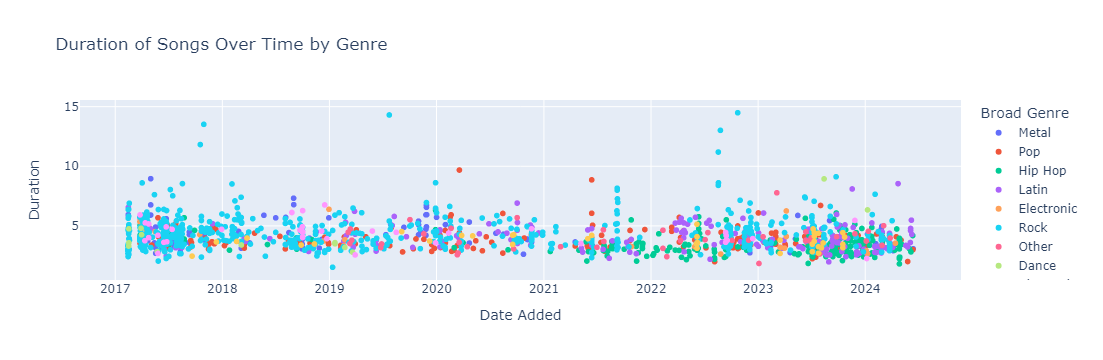

In [59]:
top_genres = ['Alternative', 'Dance', 'Electronic', 'Hip Hop', 'Indie', 'Latin', 'Metal', 'Other', 'Pop', 'Rock']
df_top_genres = df[df['Broad Genre'].isin(top_genres)]
fig = px.scatter(df_top_genres, y='Duration', x='Date Added', color='Broad Genre', hover_data={'Track Name': True}, title='Duration of Songs Over Time by Genre')
fig.show()

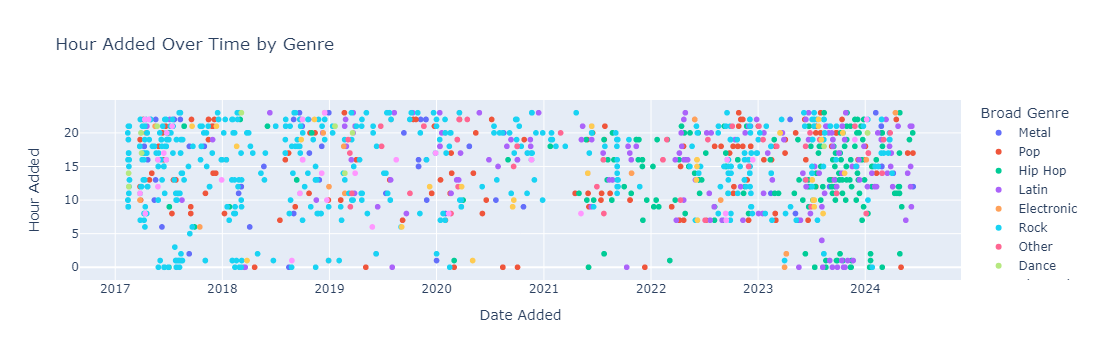

In [63]:
fig = px.scatter(df_top_genres, y='Hour Added', x='Date Added', color='Broad Genre', hover_data={'Track Name': True}, title='Hour Added Over Time by Genre')
fig.show()

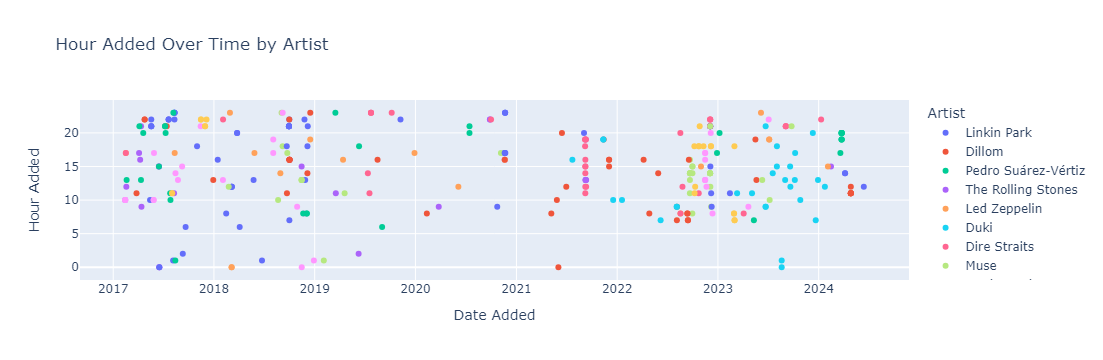

In [108]:
fig = px.scatter(df_top_artists, y='Hour Added', x='Date Added', color='Artist', hover_data={'Track Name': True}, title='Hour Added Over Time by Artist')
fig.show()

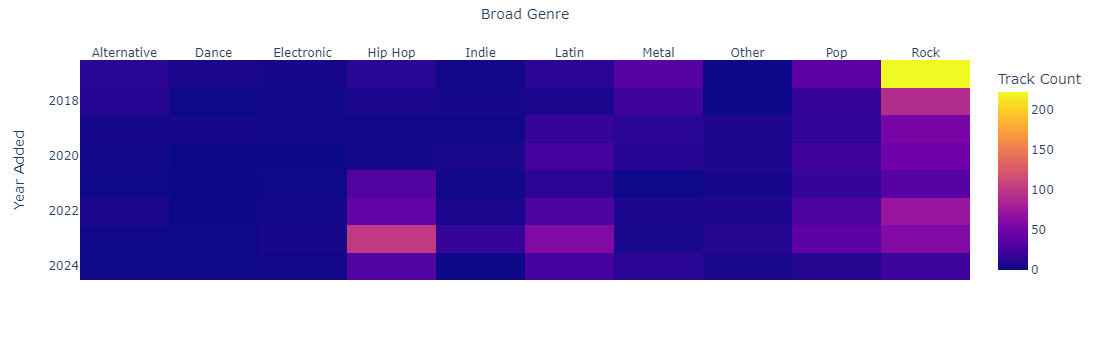

In [114]:
heatmap_data = df_top_genres.pivot_table(index='Year Added', columns='Broad Genre', aggfunc='size', fill_value=0)
fig = px.imshow(heatmap_data,
                labels=dict(x='Broad Genre', y='Year Added', color="Track Count"),
                x=heatmap_data.columns,
                y=heatmap_data.index)
fig.update_xaxes(side="top")
fig.show()

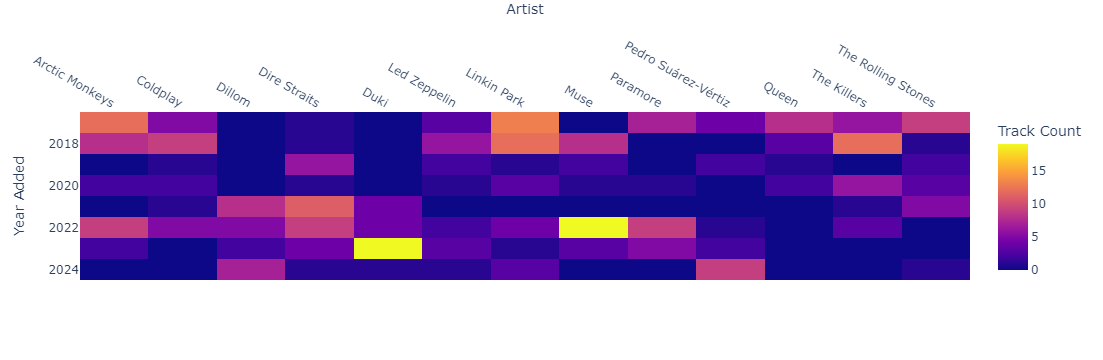

In [115]:
heatmap_data = df_top_artists.pivot_table(index='Year Added', columns='Artist', aggfunc='size', fill_value=0)
fig = px.imshow(heatmap_data,
                labels=dict(x='Artist', y='Year Added', color="Track Count"),
                x=heatmap_data.columns,
                y=heatmap_data.index)
fig.update_xaxes(side="top")
fig.show()

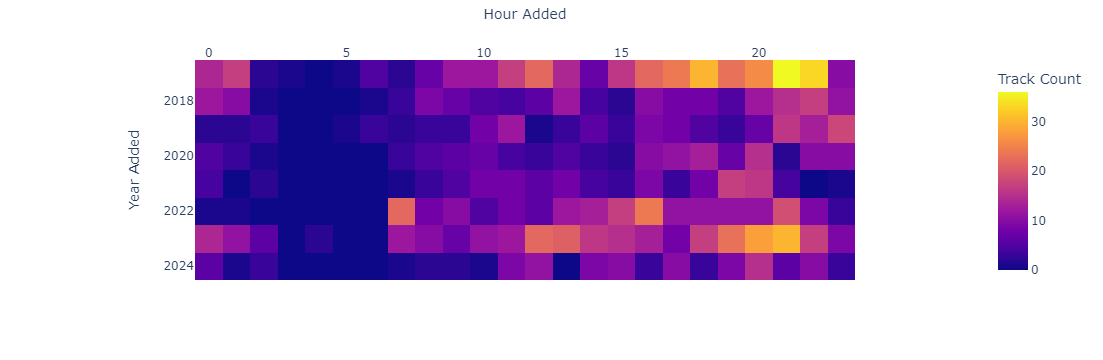

In [116]:
heatmap_data = df.pivot_table(index='Year Added', columns='Hour Added', aggfunc='size', fill_value=0)
fig = px.imshow(heatmap_data,
                labels=dict(x='Hour Added', y='Year Added', color="Track Count"),
                x=heatmap_data.columns,
                y=heatmap_data.index)
fig.update_xaxes(side="top")
fig.show()

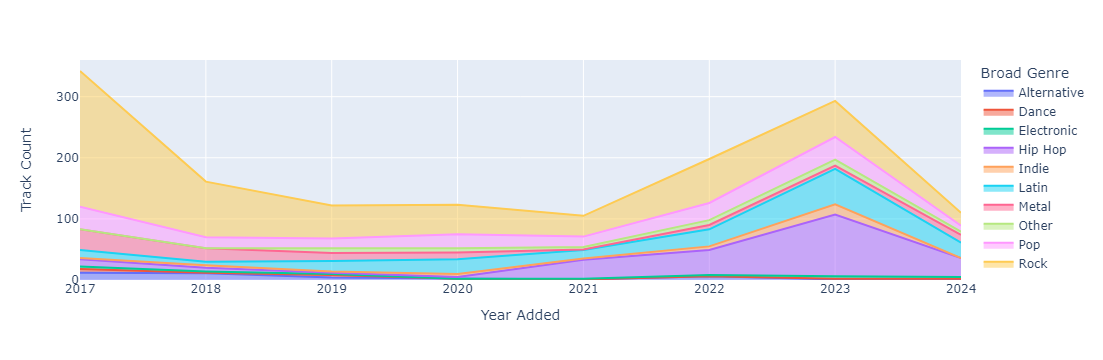

In [119]:
df_top_genres_grouped = df_top_genres.groupby(['Broad Genre', 'Year Added']).size().reset_index(name='Track Count')
fig = px.area(df_top_genres_grouped, x="Year Added", y='Track Count', color='Broad Genre', line_group='Broad Genre')
fig.show()

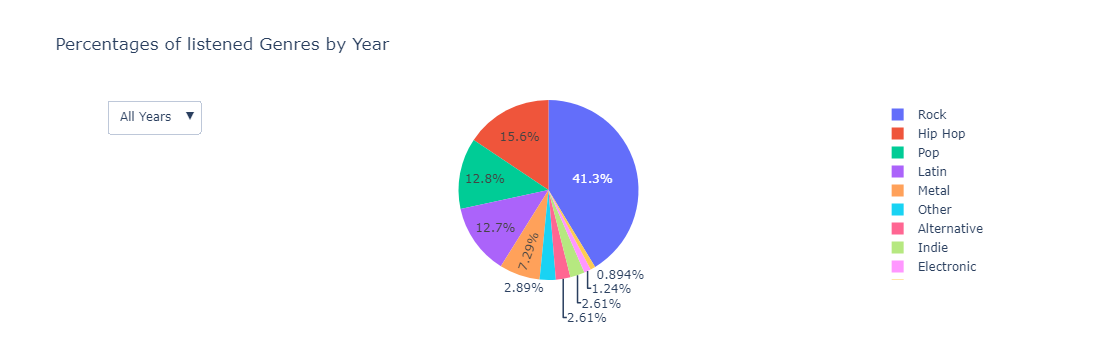

In [134]:
years = df_top_genres_grouped['Year Added'].unique()
fig = go.Figure()

# trace for each year
for year in years:
    year_data = df_top_genres_grouped[df_top_genres_grouped['Year Added'] == year]
    fig.add_trace(go.Pie(
        labels=year_data['Broad Genre'],
        values=year_data['Track Count'],
        name=str(year),
        visible=False))

# trace for all years combined
all_data = df_top_genres_grouped.groupby('Broad Genre')['Track Count'].sum().reset_index()
fig.add_trace(go.Pie(
    labels=all_data['Broad Genre'],
    values=all_data['Track Count'],
    name="All Years",
    visible=True))

fig.update_layout(
    updatemenus=[dict(
            active=0,
            buttons=[dict(label="All Years",
                          method="update",
                          args=[{"visible": [False] * len(years) + [True]},
                                {"title": "Percentages of listened Genres - All Years"}])]
            + [dict(label=str(year),
                    method="update",
                    args=[{"visible": [i == idx for i in range(len(years))] + [False]},
                          {"title": f"Percentages of listened Genres in {year}"}])
               for idx, year in enumerate(years)])], title_text="Percentages of listened Genres by Year")

fig.show()